In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
import numpy as np
import cv2
import glob
import sys
import pandas as pd
import seaborn as sns

In [ ]:
%cd '/content/drive/MyDrive/HACKATHON'

/content/drive/MyDrive/HACKATHON


In [ ]:
!pwd

/content/drive/MyDrive/HACKATHON


In [ ]:
## scores_list 를 DataFrame 형태로 변환해서 csv 파일에 저장한거 불러오기

landmark = pd.read_csv("test.csv" , index_col=0)
landmark

,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8,angle_9,angle_10,...,l_eyes_ratio,eyebrows_ratio,r_eyes_ratio,l_eyes_length_and_height,r_eyes_length_and_height,bottom_width,bottom_heiht,l_shape_eyes,r_shape_eyes,full_face_ratio
0,0.982,0.965,0.921,0.934,0.923,0.952,0.900,0.866,0.878,0.952,...,0.185,0.419,0.185,0.166,0.190,0.689,0.517,35.936,-48.815,0.799
1,0.981,0.953,0.924,0.933,0.955,0.935,0.860,0.832,0.850,0.989,...,0.201,0.409,0.173,0.150,0.171,0.561,0.464,38.929,-50.799,0.842
2,0.947,0.979,0.959,0.927,0.924,0.935,0.891,0.878,0.887,0.971,...,0.173,0.429,0.173,0.202,0.228,0.640,0.458,34.928,-50.796,0.829
3,1.063,0.943,0.976,0.965,1.000,0.980,0.838,0.839,0.917,0.942,...,0.147,0.390,0.199,0.224,0.195,0.580,0.483,30.936,-44.857,0.804
4,0.981,0.978,0.938,0.912,0.906,0.950,0.890,0.927,0.911,0.952,...,0.178,0.418,0.185,0.180,0.186,0.664,0.492,36.909,-53.811,0.877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25153,0.962,0.984,0.932,0.926,0.956,0.938,0.866,0.887,0.880,0.950,...,0.168,0.430,0.175,0.187,0.200,0.650,0.439,37.899,-48.822,0.887
25154,0.965,0.944,0.935,0.919,0.924,0.953,0.919,0.852,0.896,0.943,...,0.188,0.424,0.180,0.188,0.196,0.642,0.484,34.928,-48.816,0.831
25155,0.953,0.950,0.915,0.910,0.968,0.952,0.888,0.817,0.820,0.976,...,0.206,0.395,0.176,0.189,0.213,0.590,0.500,33.965,-52.779,0.804
25156,0.969,0.945,0.962,0.890,0.933,0.944,0.907,0.897,0.907,0.926,...,0.164,0.435,0.151,0.175,0.187,0.671,0.522,31.946,-50.804,0.873


In [ ]:
## 그래프 그려보기
## 히스토그램 정규분포로 확인하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'count')

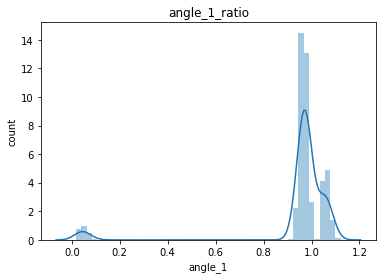

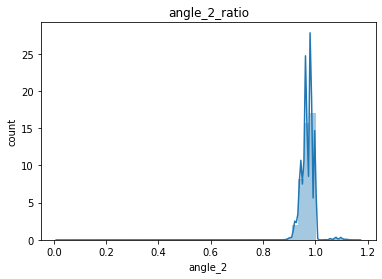

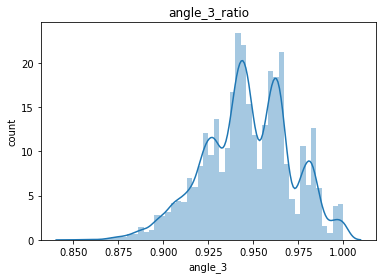

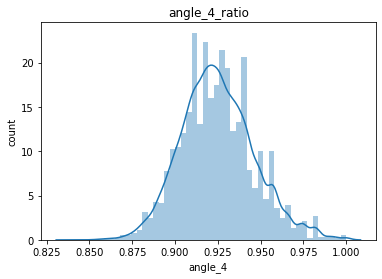

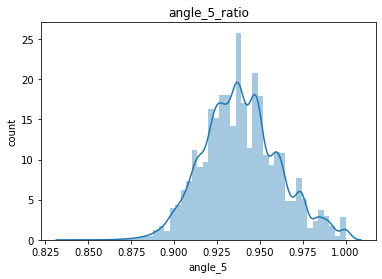

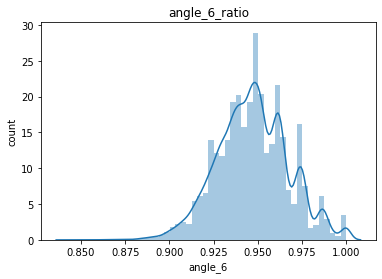

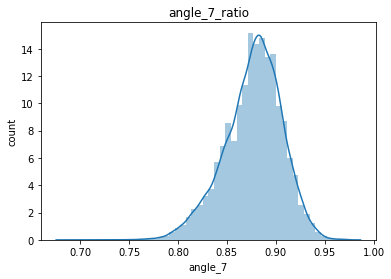

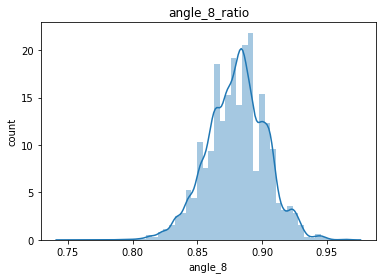

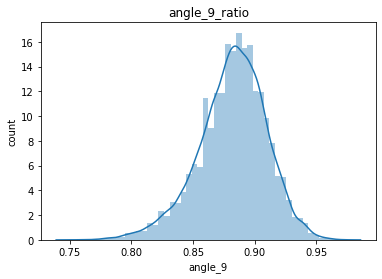

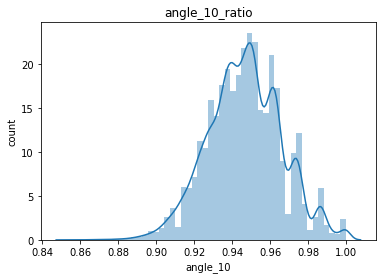

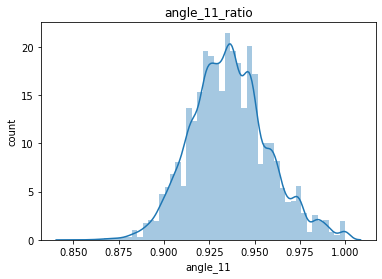

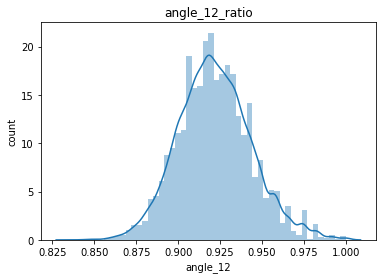

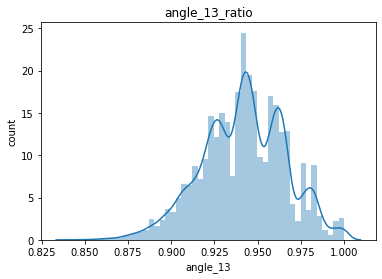

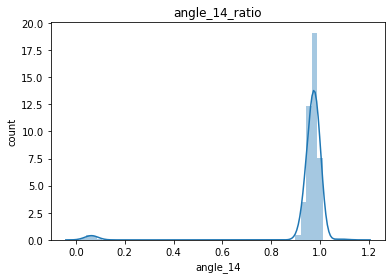

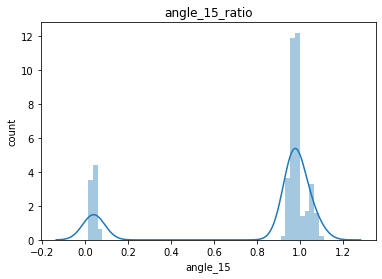

In [ ]:
## 턱이랑 광대 각도 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['angle_1'])
ax.set_title('angle_1_ratio')
ax.set_xlabel('angle_1')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_2'])
ax.set_title('angle_2_ratio')
ax.set_xlabel('angle_2')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_3'])
ax.set_title('angle_3_ratio')
ax.set_xlabel('angle_3')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_4'])
ax.set_title('angle_4_ratio')
ax.set_xlabel('angle_4')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_5'])
ax.set_title('angle_5_ratio')
ax.set_xlabel('angle_5')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_6'])
ax.set_title('angle_6_ratio')
ax.set_xlabel('angle_6')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_7'])
ax.set_title('angle_7_ratio')
ax.set_xlabel('angle_7')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_8'])
ax.set_title('angle_8_ratio')
ax.set_xlabel('angle_8')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_9'])
ax.set_title('angle_9_ratio')
ax.set_xlabel('angle_9')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_10'])
ax.set_title('angle_10_ratio')
ax.set_xlabel('angle_10')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_11'])
ax.set_title('angle_11_ratio')
ax.set_xlabel('angle_11')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_12'])
ax.set_title('angle_12_ratio')
ax.set_xlabel('angle_12')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_13'])
ax.set_title('angle_13_ratio')
ax.set_xlabel('angle_13')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_14'])
ax.set_title('angle_14_ratio')
ax.set_xlabel('angle_14')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['angle_15'])
ax.set_title('angle_15_ratio')
ax.set_xlabel('angle_15')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

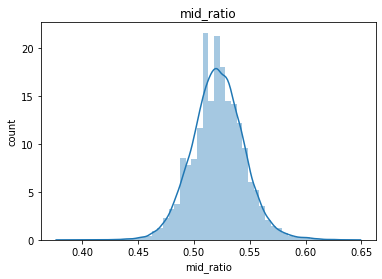

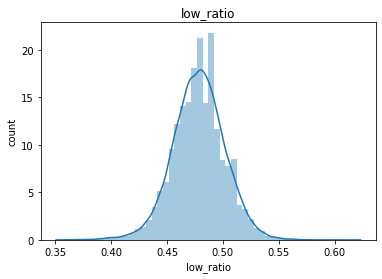

In [ ]:
## 중안부 하안부 비율 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['mid_ratio'])
ax.set_title('mid_ratio')
ax.set_xlabel('mid_ratio')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['low_ratio'])
ax.set_title('low_ratio')
ax.set_xlabel('low_ratio')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

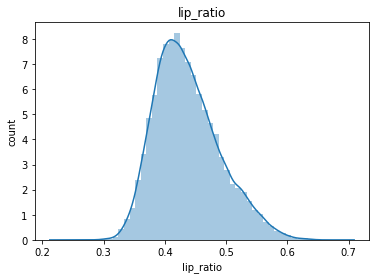

In [ ]:
## 입술 비율 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['lip_ratio'])
ax.set_title('lip_ratio')
ax.set_xlabel('lip_ratio')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

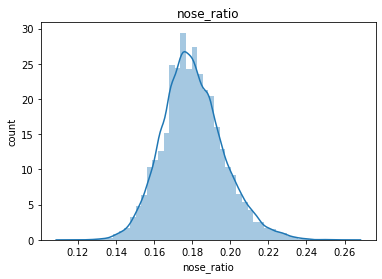

In [ ]:
## 코 비율 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['nose_ratio'])
ax.set_title('nose_ratio')
ax.set_xlabel('nose_ratio')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'count')

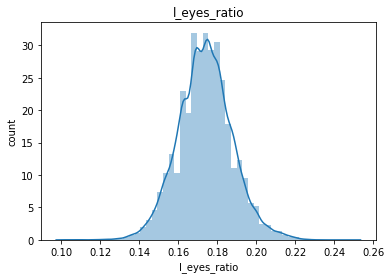

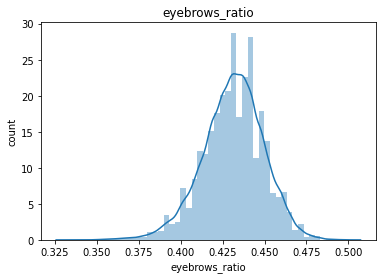

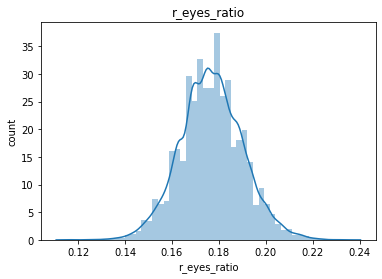

In [ ]:
## 왼쪽, 오른쪽 눈길이 & 미간 비율 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['l_eyes_ratio'])
ax.set_title('l_eyes_ratio')
ax.set_xlabel('l_eyes_ratio')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['eyebrows_ratio'])
ax.set_title('eyebrows_ratio')
ax.set_xlabel('eyebrows_ratio')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['r_eyes_ratio'])
ax.set_title('r_eyes_ratio')
ax.set_xlabel('r_eyes_ratio')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

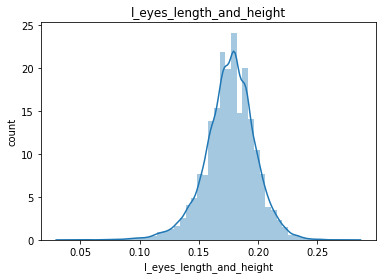

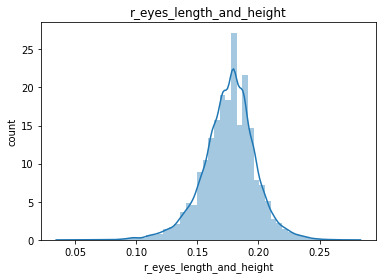

In [ ]:
## 왼쪽 오른쪽 눈 크기 비율 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['l_eyes_length_and_height'])
ax.set_title('l_eyes_length_and_height')
ax.set_xlabel('l_eyes_length_and_height')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['r_eyes_length_and_height'])
ax.set_title('r_eyes_length_and_height')
ax.set_xlabel('r_eyes_length_and_height')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

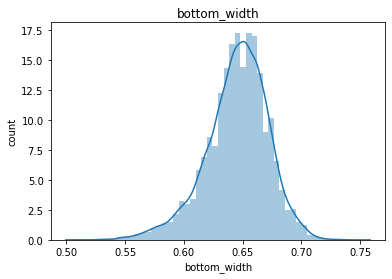

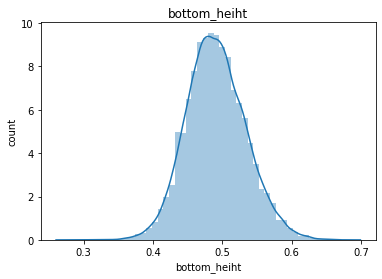

In [ ]:
## 하관 (길이, 넓이) 비율 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['bottom_width'])
ax.set_title('bottom_width')
ax.set_xlabel('bottom_width')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['bottom_heiht'])
ax.set_title('bottom_heiht')
ax.set_xlabel('bottom_heiht')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

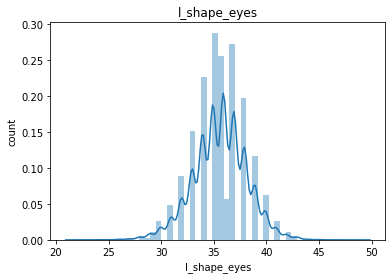

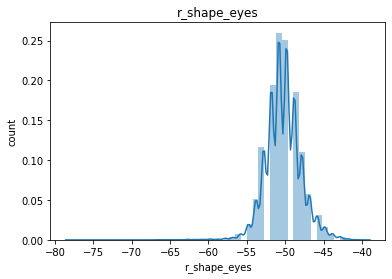

In [ ]:
## 왼쪽, 오른쪽 눈매 기울기 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['l_shape_eyes'])
ax.set_title('l_shape_eyes')
ax.set_xlabel('l_shape_eyes')
ax.set_ylabel('count')

ax = plt.subplots()
ax = sns.distplot(landmark['r_shape_eyes'])
ax.set_title('r_shape_eyes')
ax.set_xlabel('r_shape_eyes')
ax.set_ylabel('count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

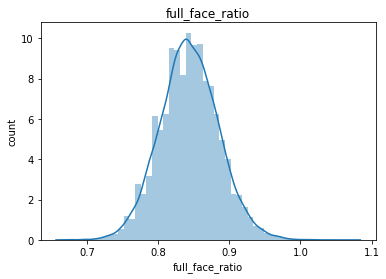

In [ ]:
## 얼굴 전체 비율 그래프

ax = plt.subplots()
ax = sns.distplot(landmark['full_face_ratio'])
ax.set_title('full_face_ratio')
ax.set_xlabel('full_face_ratio')
ax.set_ylabel('count')